In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Task 1
To begin, load your favourite image, approximately samosachutney.jpg and save the resulting matrix
as imgmat. Use the size function to find the dimensions m, n of the matrix.

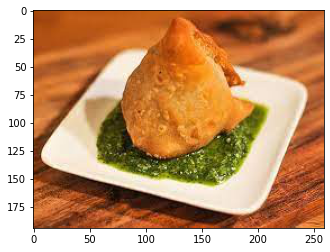

In [ ]:
imgmat = plt.imread('/content/samosachutney.jpg') #1
plt.imshow(imgmat)

In [ ]:
print(imgmat.shape)

(194, 259, 3)


In [ ]:
h,w,*_ = imgmat.shape
print(h,w)   #Dimention of Matrix

194 259


#Task 2
Introduce some noise into the image by adding random fluctuations of color to each point:
$$imgmat=imgmat+50*(np.random.rand(m,n)-0.5);$$
Observe that the command rand(m,n) produces a matrix of the dimension m × n filled with pseudorandom numbers within the interval (0, 1). The amplitude of the noise is equal to 25 shades of gray.

In [ ]:
imgmat_n=imgmat+50*(np.random.rand(h,w,3)-0.5) #2


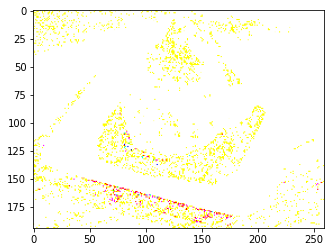

In [ ]:
plt.imshow(imgmat_n)

#Task 3
A blurring filter, Gaussian blur, is given by the matrix: K_gauss
which assigns a higher weight to the pixel color in the center. Use the convolution function to apply
the Gaussian filter and display the result.

In [ ]:

K_gauss = np.array(([0,0.125,0],[0.125,0.5,0.125],[0,0.125,0]), dtype = np.float64) #3
K_gauss2 = np.array(([0,1,2,1,0],[1,4,8,4,1],[2,8,16,8,2],[1,4,8,4,1],[0,1,2,1,0]), dtype = np.float64)/80

In [ ]:
imgmat2 = np.empty((h+2, w+2, 3), dtype = np.float64) #padding for borders

for i in range(0, h-2):
  for j in range(0,w-2):
    imgmat2[i+1,j+1] = imgmat[i,j]*K_gauss[0,0] + imgmat[i,j+1]*K_gauss[0,1] + imgmat[i,j+2]*K_gauss[0,2] + imgmat[i+1,j]*K_gauss[1,0] + imgmat[i+1,j+1]*K_gauss[1,1] + imgmat[i+1,j+2]*K_gauss[1,2] + imgmat[i+2,j]*K_gauss[2,0] + imgmat[i+2,j+1]*K_gauss[2,1] + imgmat[i+2,j+2]*K_gauss[2,2]

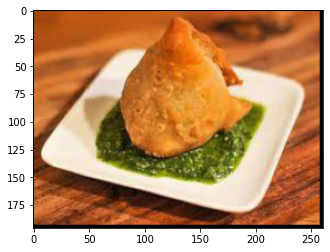

In [ ]:
plt.imshow(np.uint8(imgmat2)) #Result of applying gaussian convolution once

#Task 4
Observe that we can “layer” filter effects. Perform another convolution with the Gaussian kernel on
the image and display the result.

In [ ]:
imgmat3 = np.empty((h+2, w+2, 3), dtype = np.float64)

for i in range(0, h-2):
  for j in range(0,w-2):
    imgmat3[i+1,j+1] = imgmat2[i,j]*K_gauss[0,0] + imgmat2[i,j+1]*K_gauss[0,1] + imgmat2[i,j+2]*K_gauss[0,2] + imgmat2[i+1,j]*K_gauss[1,0] + imgmat2[i+1,j+1]*K_gauss[1,1] + imgmat2[i+1,j+2]*K_gauss[1,2] + imgmat2[i+2,j]*K_gauss[2,0] + imgmat2[i+2,j+1]*K_gauss[2,1] + imgmat2[i+2,j+2]*K_gauss[2,2]

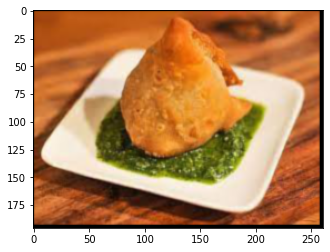

In [ ]:
plt.imshow(np.uint8(imgmat3)) #Result of applying gaussian convolution twice i.e. layered

#Task 5
Devise a matrix for a filter which is equivalent to applying Gaussian
convolution twice.

What is the size of the matrix for this filter?

In [ ]:
K_gauss2_equi = np.array(([0,0,1,0,0],[0,2,8,2,0],[1,8,20,8,1],[0,2,8,2,0],[0,0,1,0,0]), dtype = np.float64)/64 #The size of matrix is 5*5

In [ ]:
imgmat_equi = np.empty((h+2, w+2, 3), dtype = np.float64)

for i in range(0, h-4):
  for j in range(0,w-4):
    imgmat_equi[i+1,j+1] = imgmat[i,j]*K_gauss2_equi[0,0] + imgmat[i,j+1]*K_gauss2_equi[0,1] + imgmat[i,j+2]*K_gauss2_equi[0,2] + imgmat[i,j+3]*K_gauss2_equi[0,3] + imgmat[i,j+4]*K_gauss2_equi[0,4] + imgmat[i+1,j]*K_gauss2_equi[1,0] + imgmat[i+1,j+1]*K_gauss2_equi[1,1] + imgmat[i+1,j+2]*K_gauss2_equi[1,2] + imgmat[i+1,j+3]*K_gauss2_equi[1,3] + imgmat[i+1,j+4]*K_gauss2_equi[1,4] + imgmat[i+2,j]*K_gauss2_equi[2,0] + imgmat[i+2,j+1]*K_gauss2_equi[2,1] + imgmat[i+2,j+2]*K_gauss2_equi[2,2] + imgmat[i+2,j+3]*K_gauss2_equi[2,3] + imgmat[i+2,j+4]*K_gauss2_equi[2,4] + imgmat[i+3,j]*K_gauss2_equi[3,0] + imgmat[i+3,j+1]*K_gauss2_equi[3,1] + imgmat[i+3,j+2]*K_gauss2_equi[3,2] + imgmat[i+3,j+3]*K_gauss2_equi[3,3] + imgmat[i+3,j+4]*K_gauss2_equi[3,4] + imgmat[i+4,j]*K_gauss2_equi[4,0] + imgmat[i+4,j+1]*K_gauss2_equi[4,1] + imgmat[i+4,j+2]*K_gauss2_equi[4,2] + imgmat[i+4,j+3]*K_gauss2_equi[4,3] + imgmat[i+4,j+4]*K_gauss2_equi[4,4]

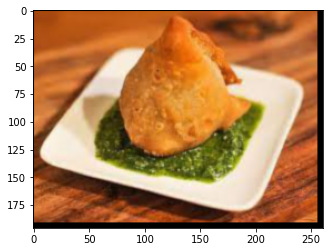

In [ ]:
plt.imshow(np.uint8(imgmat_equi)) #Result of applying gaussian convolution equivalent to gaussian convolution twice as in Q-4

#Task 6

It is also possible to blur the image over a larger area using a larger filter matrix:
K_gauss (a 5*5 kernal)
Apply the kernel to the image matrix and display the result.




In [ ]:
imgmat4 = np.empty((h+2, w+2, 3), dtype = np.float64)

for i in range(0, h-4):
  for j in range(0,w-4):
    imgmat4[i+1,j+1] = imgmat[i,j]*K_gauss2[0,0] + imgmat[i,j+1]*K_gauss2[0,1] + imgmat[i,j+2]*K_gauss2[0,2] + imgmat[i,j+3]*K_gauss2[0,3] + imgmat[i,j+4]*K_gauss2[0,4] + imgmat[i+1,j]*K_gauss2[1,0] + imgmat[i+1,j+1]*K_gauss2[1,1] + imgmat[i+1,j+2]*K_gauss2[1,2] + imgmat[i+1,j+3]*K_gauss2[1,3] + imgmat[i+1,j+4]*K_gauss2[1,4] + imgmat[i+2,j]*K_gauss2[2,0] + imgmat[i+2,j+1]*K_gauss2[2,1] + imgmat[i+2,j+2]*K_gauss2[2,2] + imgmat[i+2,j+3]*K_gauss2[2,3] + imgmat[i+2,j+4]*K_gauss2[2,4] + imgmat[i+3,j]*K_gauss2[3,0] + imgmat[i+3,j+1]*K_gauss2[3,1] + imgmat[i+3,j+2]*K_gauss2[3,2] + imgmat[i+3,j+3]*K_gauss2[3,3] + imgmat[i+3,j+4]*K_gauss2[3,4] + imgmat[i+4,j]*K_gauss2[4,0] + imgmat[i+4,j+1]*K_gauss2[4,1] + imgmat[i+4,j+2]*K_gauss2[4,2] + imgmat[i+4,j+3]*K_gauss2[4,3] + imgmat[i+4,j+4]*K_gauss2[4,4]

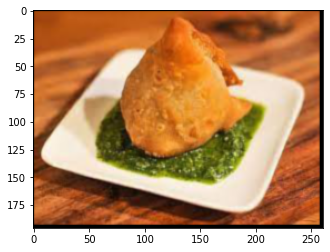

In [ ]:
plt.imshow(np.uint8(imgmat3)) #Result of applying large size kernal (5*5)

#Task 7
Compare with applying Gaussian blur applied twice. Which one blurs more?



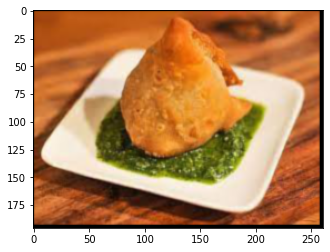

In [ ]:


plt.imshow(np.uint8(imgmat3))

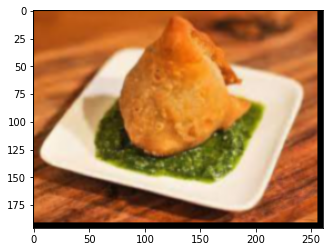

In [ ]:
plt.imshow(np.uint8(imgmat4))

**By comparing imgmat3 and imgmat4, we can say that imgmat4 is more blurred.
(Large size kernal blurs more)**

#Task 8
Finally, it is possible to use convolution to detect edges in the image. Edge detection is used for imagesegmentation and data extraction in areas such as image processing, computer vision, and machine
vision.

Two of the most common filters used for these are the Sobel horizontal and vertical filters:
*K_sobel1 & K_sobel2*


Sobel filters can be interpreted as discrete derivatives in the horizontal and vertical directions. Perform the convolution of the original image with the Sobel kernels using the convolution function conv2 and save the resulting arrays as Sobel1 and Sobel2. Display the results in new figure windows.

In [ ]:
K_sobel1 = np.array(([-1,0,1],[-2,0,2],[-1,0,1]), dtype = np.float64)
K_sobel2 = np.array(([-1,-2,-1],[0,0,0],[1,2,1]), dtype = np.float64)
K_sobel12 = np.array(([1,0,-1],[0,0,0],[-1,0,1]), dtype = np.float64)
K_lap = np.array(([0,-1,0],[-1,4,-1],[0,-1,0]), dtype = np.float64)

In [ ]:
Sobel1 = np.empty((h+2, w+2, 3), dtype = np.float64)

for i in range(0, h-2):
  for j in range(0,w-2):
    Sobel1[i+1,j+1] = imgmat[i,j]*K_sobel1[0,0] + imgmat[i,j+1]*K_sobel1[0,1] + imgmat[i,j+2]*K_sobel1[0,2] + imgmat[i+1,j]*K_sobel1[1,0] + imgmat[i+1,j+1]*K_sobel1[1,1] + imgmat[i+1,j+2]*K_sobel1[1,2] + imgmat[i+2,j]*K_sobel1[2,0] + imgmat[i+2,j+1]*K_sobel1[2,1] + imgmat[i+2,j+2]*K_sobel1[2,2]

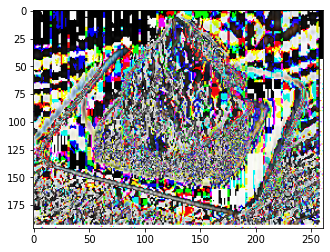

In [ ]:
plt.imshow(np.uint8(Sobel1)) #8

In [ ]:
Sobel2 = np.empty((h+2, w+2, 3), dtype = np.float64)

for i in range(0, h-2):
  for j in range(0,w-2):
    Sobel2[i+1,j+1] = imgmat[i,j]*K_sobel2[0,0] + imgmat[i,j+1]*K_sobel2[0,1] + imgmat[i,j+2]*K_sobel2[0,2] + imgmat[i+1,j]*K_sobel2[1,0] + imgmat[i+1,j+1]*K_sobel2[1,1] + imgmat[i+1,j+2]*K_sobel2[1,2] + imgmat[i+2,j]*K_sobel2[2,0] + imgmat[i+2,j+1]*K_sobel2[2,1] + imgmat[i+2,j+2]*K_sobel2[2,2]

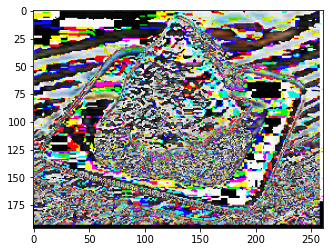

In [ ]:
plt.imshow(np.uint8(Sobel2)) #8

#Task 9
Create a combined image with both horizontal and vertical edges by summing up the matrices KSobel1
, KSobel2
Display the result in a new figure window

In [ ]:
Sobel_12 = np.empty((h+2, w+2, 3), dtype = np.float64)

for i in range(0, h-2):
  for j in range(0,w-2):
    Sobel_12[i+1,j+1] = imgmat[i,j]*K_sobel12[0,0] + imgmat[i,j+1]*K_sobel12[0,1] + imgmat[i,j+2]*K_sobel12[0,2] + imgmat[i+1,j]*K_sobel12[1,0] + imgmat[i+1,j+1]*K_sobel12[1,1] + imgmat[i+1,j+2]*K_sobel12[1,2] + imgmat[i+2,j]*K_sobel12[2,0] + imgmat[i+2,j+1]*K_sobel12[2,1] + imgmat[i+2,j+2]*K_sobel12[2,2]

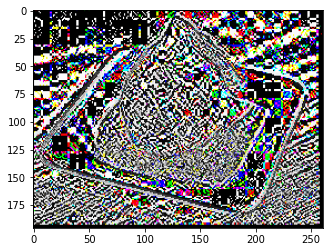

In [ ]:

plt.imshow(np.uint8(Sobel_12)) #9

Alternative
 solution

In [ ]:
imgmat_try = np.empty((h+2, w+2, 3), dtype = np.float64)

for i in range(0, h-2):
  for j in range(0,w-2):
    imgmat_try[i+1,j+1] = imgmat[i,j]*K_sobel1[0,0]*K_sobel2[0,0] + imgmat[i,j+1]*K_sobel1[0,1]*K_sobel2[0,1] + imgmat[i,j+2]*K_sobel1[0,2]*K_sobel2[0,2] + imgmat[i+1,j]*K_sobel1[1,0]*K_sobel2[1,0] + imgmat[i+1,j+1]*K_sobel1[1,1]*K_sobel2[1,1] + imgmat[i+1,j+2]*K_sobel1[1,2]*K_sobel2[1,2] + imgmat[i+2,j]*K_sobel1[2,0]*K_sobel2[2,0] + imgmat[i+2,j+1]*K_sobel1[2,1]*K_sobel2[2,1] + imgmat[i+2,j+2]*K_sobel1[2,2]*K_sobel2[2,2]

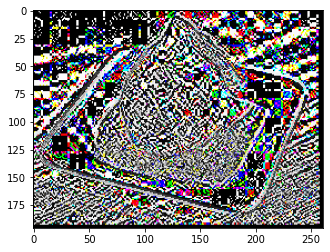

In [ ]:
plt.imshow(np.uint8(imgmat_try)) #9

#Task 10
Alternatively, Laplacian edge detection can be used with the following filter:
K_lap.


The laplace kernel is a discrete analogue of continuous Laplacian and may be interpreted as a sum of two discrete partial derivatives of the second order

In [ ]:
imgmat_lap = np.empty((h+2, w+2, 3), dtype = np.float64)

for i in range(0, h-2):
  for j in range(0,w-2):
    imgmat_lap[i+1,j+1] = imgmat[i,j]*K_lap[0,0] + imgmat[i,j+1]*K_lap[0,1] + imgmat[i,j+2]*K_lap[0,2] + imgmat[i+1,j]*K_lap[1,0] + imgmat[i+1,j+1]*K_lap[1,1] + imgmat[i+1,j+2]*K_lap[1,2] + imgmat[i+2,j]*K_lap[2,0] + imgmat[i+2,j+1]*K_lap[2,1] + imgmat[i+2,j+2]*K_lap[2,2]

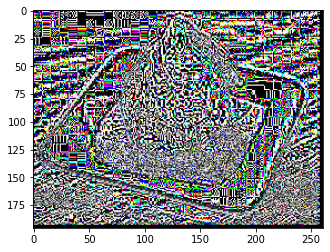

In [ ]:
plt.imshow(np.uint8(imgmat_lap)) #10